In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

TUXML_CSV_FILENAME="./config_bdd.csv"

# sanity check CSV
with open(TUXML_CSV_FILENAME, "r") as file:
    k = file.readline()
    t = k.split(",")
    s = set(t)
    assert(len(t) == len(s)) # unique number of options/features/column names

# parsing for real with pandas 
rawtuxdata = pd.read_csv(open(TUXML_CSV_FILENAME, "r"))

basic_head = ["cid", "time", "date"] # "compile"
size_methods = ["vmlinux", "GZIP-bzImage", "GZIP-vmlinux", "GZIP", "BZIP2-bzImage", 
              "BZIP2-vmlinux", "BZIP2", "LZMA-bzImage", "LZMA-vmlinux", "LZMA", "XZ-bzImage", "XZ-vmlinux", "XZ", 
              "LZO-bzImage", "LZO-vmlinux", "LZO", "LZ4-bzImage", "LZ4-vmlinux", "LZ4"]


### basic stats about options and remove of unique values 
## could be improved 

tri_state_values = ['y', 'n', 'm']

ftuniques = []
freq_ymn_features = []
non_tristate_options = []

for col in rawtuxdata:
    ft = rawtuxdata[col]    
    # eg always "y"
    if len(ft.unique()) == 1:
        ftuniques.append(col)
    # only tri-state values (y, n, m) (possible TODO: handle numerical/string options)    
    elif all(x in tri_state_values for x in ft.unique()):     #len(ft.unique()) == 3: 
        freq = ft.value_counts(normalize=True)
        freqy = 0
        freqn = 0
        freqm = 0
        if ('y' in freq.index):
            freqy = freq['y']
        if ('n' in freq.index):
            freqn = freq['n']
        if ('m' in freq.index):
            freqm = freq['m']
        freq_ymn_features.append((col, freqy, freqm, freqn))
    else:
        if not (col in size_methods): 
            non_tristate_options.append(col)
        

### TODO: we want to keep all quantitative values!
# non_tristate_options.remove('LZO') # ('vmlinux')

# we want to keep measurements (that are not tristate ;)) 
# non_tristate_options = list(set(non_tristate_options) - set(size_methods))

#### print options with unique values
# options with only one value eg always "y"
#i = 0
#for ft in ftuniques:
#    print(ft + " (" + str(i) + ")")
#    i = i + 1

print("Original size (#configs/#options) of the dataset " + str(rawtuxdata.shape))
print ("Number of options with only one value (eg always y): " + str(pd.DataFrame(ftuniques).shape))

# maybe we can drop options with only one unique value (no interest for machine learning)
rawtuxdata.drop(columns=ftuniques,inplace=True)

## non_tristate_options include basic stuff like date, time, cid but also string/numerical options
print ("Non tri-state value options (eg string or integer or hybrid values): " 
       + str(pd.DataFrame(non_tristate_options).shape) + " ") 
#      + str(pd.DataFrame(non_tristate_options)))


print ("Predictor variables: " + str(rawtuxdata.drop(columns=non_tristate_options).columns.size))
# frequency of y, m, and n values 
#plt.figure()
#pd.DataFrame(freq_ymn_features, columns=["feature", "freqy", "freqm", "freqn"]).plot(kind='hist', alpha=0.8) #plot()
#plt.show()


    



/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (114,143,1040,1150,2722,5459,6015,6026,6717,6719,7350,7676,7726,8507,9784,9949,10442) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Original size (#configs/#options) of the dataset (1154, 12798)
Number of options with only one value (eg always y): (3120, 1)
Non tri-state value options (eg string or integer or hybrid values): (156, 1) 
Predictor variables: 9522


In [2]:
print("Data exploration")

Data exploration


In [3]:
rawtuxdata.query("AIC7XXX_BUILD_FIRMWARE == 'y'")[['cid', 'vmlinux']]

,cid,vmlinux
24,78924,-1
48,78948,-1
55,78955,-1
89,78989,-1
102,79002,-1
109,79009,-1
110,79010,-1
137,79037,-1
152,79052,-1
199,79099,-1


In [4]:
#rawtuxdata[rawtuxdata['X86_64'] == 'n']
rawtuxdata.query("X86_64 == 'n'")

,cid,date,time,vmlinux,GZIP-bzImage,GZIP-vmlinux,GZIP,BZIP2-bzImage,BZIP2-vmlinux,BZIP2,...,SND_SOC_INTEL_SKL_NAU88L25_SSM4567_MACH,APDS9960,ARCH_SUPPORTS_INT128,SLABINFO,MICROCODE_AMD,ISDN_DRV_HISAX,CHARGER_BQ24190,SND_SOC_NAU8825,BH1750,NETWORK_FILESYSTEMS
0,78900,2018-07-24 10:27:13,419.486,12902464,4179536,4170328,4139460,4317824,4307704,4289107,...,n,n,n,n,n,n,m,n,n,n
28,78928,2018-07-24 10:45:36,401.464,77752024,10802160,10793464,10763241,10194768,10185168,10166890,...,n,n,n,y,n,n,n,n,n,n
43,78943,2018-07-24 10:54:59,409.821,111136692,8134864,8126436,8090438,8221984,8212640,8188849,...,n,n,n,n,y,n,y,n,n,n
46,78946,2018-07-24 10:56:18,945.359,21622656,8546512,8537304,8506977,8053488,8043368,8025088,...,n,n,n,y,n,n,n,m,n,y
56,78956,2018-07-24 11:01:55,667.100,71034736,22490032,22481572,22454391,21008080,20998712,20983501,...,n,y,n,n,n,n,n,n,y,n
94,78994,2018-07-24 11:29:37,411.502,21494328,8362480,8352992,8325473,8089056,8078624,8063420,...,n,y,n,y,n,n,n,n,n,n
113,79013,2018-07-24 11:42:57,462.700,16925488,6562224,6553764,6526499,6328448,6319076,6303865,...,n,y,n,n,n,n,y,n,y,n
114,79014,2018-07-24 11:43:03,2150.800,25261016,10043440,10034740,10004163,9685776,9676172,9657870,...,n,y,n,n,y,n,y,n,y,n
116,79016,2018-07-24 11:43:34,1167.500,19606920,6690048,6682304,6645024,6721280,6712628,6687387,...,n,m,n,y,n,n,y,n,n,y
132,79032,2018-07-24 11:52:44,1071.840,49697640,10776144,10768544,10717909,10881152,10872652,10833965,...,n,n,n,y,n,m,y,m,n,n


In [5]:
#rawtuxdata[(rawtuxdata['DEBUG_INFO'] == 'n') & (rawtuxdata['GCOV_PROFILE_ALL'] == 'n') & (rawtuxdata['KASAN'] == 'n') & (rawtuxdata['MODULES'] == 'y')]
# rawtuxdata.query("(DEBUG_INFO == 'n') & (GCOV_PROFILE_ALL == 'n') & (KASAN == 'n') & (MODULES == 'y')")
rawtuxdata.query("(DEBUG_INFO == 'n') & (GCOV_PROFILE_ALL == 'n') & (KASAN == 'n')").shape, rawtuxdata.shape


((1069, 9678), (1154, 9678))

In [6]:
#rawtuxdata[rawtuxdata['vmlinux'] == 1168072][['cid', 'CC_OPTIMIZE_FOR_SIZE', 'DEBUG_INFO_DWARF4', 'KASAN', 'UBSAN_ALIGNMENT', 'X86_NEED_RELOCS', 'RANDOMIZE_BASE', 'GCOV_PROFILE_ALL', 'UBSAN_SANITIZE_ALL', 'DEBUG_INFO', 'MODULES', 'DEBUG_INFO_REDUCED', 'DEBUG_INFO_SPLIT']]
tiny_data = rawtuxdata.query("vmlinux == 1168072")
if (len(tiny_data) > 0):
    print(tiny_data[['cid', 'CC_OPTIMIZE_FOR_SIZE', 'DEBUG_INFO_DWARF4', 'KASAN', 'UBSAN_ALIGNMENT', 'X86_NEED_RELOCS', 'RANDOMIZE_BASE', 'GCOV_PROFILE_ALL', 'UBSAN_SANITIZE_ALL', 'DEBUG_INFO', 'MODULES', 'DEBUG_INFO_REDUCED', 'DEBUG_INFO_SPLIT']])

In [7]:
#rawtuxdata[rawtuxdata['vmlinux'] == -1]
rawtuxdata.query("vmlinux == -1")

,cid,date,time,vmlinux,GZIP-bzImage,GZIP-vmlinux,GZIP,BZIP2-bzImage,BZIP2-vmlinux,BZIP2,...,SND_SOC_INTEL_SKL_NAU88L25_SSM4567_MACH,APDS9960,ARCH_SUPPORTS_INT128,SLABINFO,MICROCODE_AMD,ISDN_DRV_HISAX,CHARGER_BQ24190,SND_SOC_NAU8825,BH1750,NETWORK_FILESYSTEMS
24,78924,2018-07-24 10:44:43,908.984,-1,-1,-1,-1,-1,-1,-1,...,n,m,y,y,n,m,y,n,n,y
32,78932,2018-07-24 10:48:21,657.759,-1,-1,-1,-1,-1,-1,-1,...,y,n,y,y,y,n,y,y,y,n
42,78942,2018-07-24 10:54:54,1973.950,-1,-1,-1,-1,-1,-1,-1,...,n,y,y,n,y,n,n,y,y,n
48,78948,2018-07-24 10:58:21,826.383,-1,-1,-1,-1,-1,-1,-1,...,m,n,y,n,n,n,m,m,n,n
55,78955,2018-07-24 11:01:35,633.754,-1,-1,-1,-1,-1,-1,-1,...,n,n,y,n,n,y,n,n,n,y
59,78959,2018-07-24 11:04:15,833.589,-1,-1,-1,-1,-1,-1,-1,...,n,m,y,y,y,n,m,m,m,n
75,78975,2018-07-24 11:17:16,839.596,-1,-1,-1,-1,-1,-1,-1,...,n,n,y,y,n,n,m,n,m,n
89,78989,2018-07-24 11:23:58,380.159,-1,-1,-1,-1,-1,-1,-1,...,n,m,y,n,n,n,m,n,n,n
102,79002,2018-07-24 11:34:49,369.386,-1,-1,-1,-1,-1,-1,-1,...,n,n,y,y,n,n,m,n,n,n
109,79009,2018-07-24 11:38:06,601.803,-1,-1,-1,-1,-1,-1,-1,...,n,m,y,n,y,n,n,n,n,y


In [8]:
#rawtuxdata[rawtuxdata['vmlinux'] == 1168072]['MODULES']
rawtuxdata.query("vmlinux == 1168072")['MODULES']

Series([], Name: MODULES, dtype: object)

In [9]:
# playing a bit with the data 
rawtuxdata.dtypes
# 'DEBUG_INFOO' in list(pd.DataFrame(non_tristate_options)[0]) # 
# tuxdata['DEBUG_INFO'].unique()
#tuxdata['OUTPUT_FORMAT'].dtypes
#tuxdata['DEFAULT_HOSTNAME'].unique()

#rawtuxdata[:5]
rawtuxdata[:20]['vmlinux']
#tuxdata[:5]['CONFIG_DEBUG_INFO']
#tuxdata['ARCH_HAS_SG_CHAIN'].unique()
#tuxdata['ARCH_HAS_SG_CHAIN'].astype('category')

0      12902464
1      26876960
2      39148320
3      29450928
4      16917160
5      39859032
6      48138352
7     139576032
8      34987200
9      38066184
10     90642280
11     55363712
12     63111576
13     55022968
14     53469808
15     19613808
16     54189816
17     41369280
18     22188672
19     27089784
Name: vmlinux, dtype: int64

In [10]:
rawtuxdata.shape, rawtuxdata.query("vmlinux != -1").shape

((1154, 9678), (1075, 9678))

In [11]:
from sklearn.preprocessing import *
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn import svm
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn import tree
import graphviz 


LEARN_COMPILATION_SUCCESS = True # costly in time and space 
compilation_status_column_name = 'compile_success'

def encode_data_compilation(rawtuxdata):
    lae = LabelEncoder()
    # we save quantitative values we want (here vmlinux, TODO: generalize)
    # the key idea is that the labelling encoder should not be applied to this kind of values (only to predictor variables!)
    # vml = rawtuxdata['LZO'] # rawtuxdata['vmlinux'] 
    o_sizes = rawtuxdata[size_methods]

    # we remove non tri state options, but TODO there are perhaps some interesting options (numerical or string) here
    #tuxdata = rawtuxdata.drop(columns=non_tristate_options).drop(columns=['vmlinux']).apply(le.fit_transform)
    tuxdata_for_compilation = rawtuxdata.drop(columns=non_tristate_options).drop(columns=size_methods).apply(lae.fit_transform)

    #tuxdata['vmlinux'] = vml 
    tuxdata_for_compilation[size_methods] = o_sizes
    # we can ue vmlinux since it has been restored thanks to previous line
    tuxdata_for_compilation[compilation_status_column_name] = tuxdata_for_compilation['vmlinux'] != -1
    return tuxdata_for_compilation

def learn_compilation_success(tuxdata_for_compilation):
    TESTING_SIZE=0.3 
    X_train, X_test, y_train, y_test = train_test_split(tuxdata_for_compilation.drop(columns=size_methods).drop(columns=compilation_status_column_name), tuxdata_for_compilation[compilation_status_column_name], test_size=TESTING_SIZE, random_state=0)  
    clf = tree.DecisionTreeClassifier() #GradientBoostingClassifier(n_estimators=100) #RandomForestRegressor(n_estimators=100) #   #GradientBoostingRegressor(n_estimators=100)  
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    importances = clf.feature_importances_
    indices = np.argsort(importances)[::-1]    

    TOP_FT_IMPORTANCE=20
    print("Feature ranking: " + "top (" + str(TOP_FT_IMPORTANCE) + ")")
    for f in range(TOP_FT_IMPORTANCE): # len(indices)
        print("%d. feature %s %d (%f)" % (f + 1, tuxdata_for_compilation.columns[indices[f]], indices[f], importances[indices[f]]))
   
    
    dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=tuxdata_for_compilation.drop(columns=size_methods).drop(columns=compilation_status_column_name).columns,  
                         filled=True, rounded=True,
                         special_characters=True)  
    graph = graphviz.Source(dot_data)  
    graph.render("TUXML compilation sucess")
    
    acc = accuracy_score (y_test, y_pred)
    prec = precision_score (y_test, y_pred)
    reca = recall_score (y_test, y_pred)
    f1 = f1_score (y_test, y_pred)
    print("Accuracy score: %.2f" % (acc))
    print("Precision score: %.2f" % (prec))
    print("Recall score: %.2f" % (reca))
    print("F1 score: %.2f" % (f1))

if (LEARN_COMPILATION_SUCCESS):
    tuxdata_for_compilation = encode_data_compilation(rawtuxdata)
    tuxdata_for_compilation [compilation_status_column_name].describe()
    learn_compilation_success(tuxdata_for_compilation)

Feature ranking: top (20)
1. feature AIC7XXX_BUILD_FIRMWARE 1338 (0.564551)
2. feature AIC79XX_BUILD_FIRMWARE 1921 (0.280999)
3. feature WANXL_BUILD_FIRMWARE 7998 (0.076816)
4. feature IPVTAP 4620 (0.019383)
5. feature TCIC 7604 (0.019331)
6. feature GPIO_LP873X 5137 (0.017886)
7. feature PHY_EXYNOS_MIPI_VIDEO 8575 (0.013008)
8. feature NFS_V4_SECURITY_LABEL 856 (0.006426)
9. feature SND_DAVINCI_SOC_MCASP 5053 (0.001600)
10. feature SOUND 3166 (0.000000)
11. feature IWLWIFI 3165 (0.000000)
12. feature SCSI_GDTH 3164 (0.000000)
13. feature MTD_AR7_PARTS 3163 (0.000000)
14. feature CAN_PLX_PCI 3162 (0.000000)
15. feature NETWORK_FILESYSTEMS 9502 (0.000000)
16. feature ARCH_USES_HIGH_VMA_FLAGS 3161 (0.000000)
17. feature CAN_TSCAN1 3168 (0.000000)
18. feature NVM_DEBUG 3160 (0.000000)
19. feature IWLEGACY_DEBUGFS 3159 (0.000000)
20. feature SCSI_FUTURE_DOMAIN 3158 (0.000000)
Accuracy score: 0.98
Precision score: 0.99
Recall score: 0.98
F1 score: 0.99


In [12]:
rawtuxdata.query("vmlinux == -1")[['cid', 'AIC7XXX_BUILD_FIRMWARE', 'AIC79XX_BUILD_FIRMWARE', 'IPVTAP', 'WANXL_BUILD_FIRMWARE', 'TCIC']]

,cid,AIC7XXX_BUILD_FIRMWARE,AIC79XX_BUILD_FIRMWARE,IPVTAP,WANXL_BUILD_FIRMWARE,TCIC
24,78924,y,n,m,n,n
32,78932,n,n,n,n,n
42,78942,n,y,n,n,n
48,78948,y,n,n,n,n
55,78955,y,n,n,n,n
59,78959,n,y,n,n,n
75,78975,n,y,n,n,n
89,78989,y,n,n,n,n
102,79002,y,y,n,n,n
109,79009,y,n,n,n,n


In [13]:
# aka MAPE
def mean_relative_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [14]:
# remove entries with same configurations
print(str(len(rawtuxdata)) + " before the removal of some entries (those with same configurations)")
# tuxdata.drop_duplicates(subset=tuxdata.columns.difference(['vmlinux']), inplace=True)
rawtuxdata.drop_duplicates(subset=rawtuxdata.columns.difference(size_methods).difference(basic_head), inplace=True)
print(str(len(rawtuxdata)) + " after the removal of some entries (those with same configurations)")

#n_failures = len(tuxdata[~np.isnan(tuxdata['vmlinux'])])
#n_failures = len(rawtuxdata.query("vmlinux != -1")) #len(tuxdata[np.isnan(tuxdata['vmlinux'])])
#print(str(n_failures) + " non-failures out of " + str(len(rawtuxdata)))

#tuxdata = tuxdata[~np.isnan(tuxdata['vmlinux'])]
#rawtuxdata = rawtuxdata[rawtuxdata['vmlinux'] != -1] #tuxdata[~np.isnan(tuxdata['vmlinux'])]
rawtuxdata.query("vmlinux != -1", inplace=True)
print(str(len(rawtuxdata)) + " after the removal of configurations that do NOT compile")


1154 before the removal of some entries (those with same configurations)
1154 after the removal of some entries (those with same configurations)
1075 after the removal of configurations that do NOT compile


In [15]:
print("some configurations have X86_32 (coz we have tested/tried some options and there are in the database)", rawtuxdata['X86_64'].describe())
# we only keep X86_64 configurations
#rawtuxdata = rawtuxdata[rawtuxdata['X86_64'] == 'y'] ### TODO: I've impression it's not the most effective way (wrt memory) to filter 
rawtuxdata.query("X86_64 == 'y'", inplace=True)
rawtuxdata.info(memory_usage='deep')


some configurations have X86_32 (coz we have tested/tried some options and there are in the database) count     1075
unique       2
top          y
freq      1057
Name: X86_64, dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1057 entries, 1 to 1153
Columns: 9678 entries, cid to NETWORK_FILESYSTEMS
dtypes: float64(1), int64(140), object(9537)
memory usage: 635.1 MB


<Figure size 432x288 with 0 Axes>

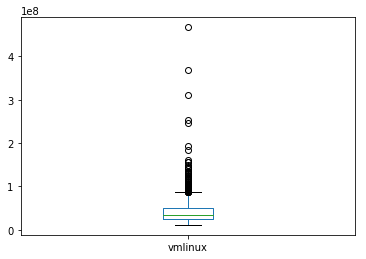

<Figure size 432x288 with 0 Axes>

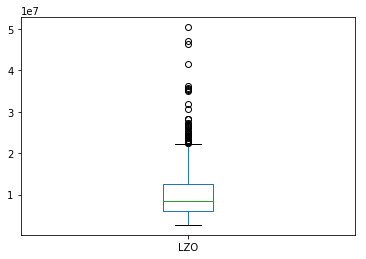

<Figure size 432x288 with 0 Axes>

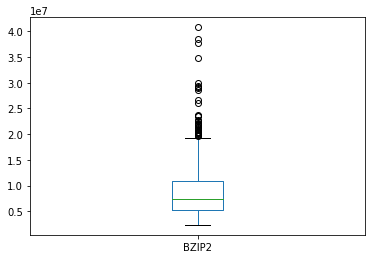

count    1.057000e+03
mean     4.237190e+07
std      3.207879e+07
min      1.095506e+07
25%      2.441905e+07
50%      3.429662e+07
75%      4.927382e+07
max      4.672682e+08
Name: vmlinux, dtype: float64

In [16]:
plt.figure()
pd.DataFrame(rawtuxdata['vmlinux']).plot.box()
plt.show(block=False)

plt.figure()
pd.DataFrame(rawtuxdata['LZO']).plot.box()
plt.show(block=False)

plt.figure()
pd.DataFrame(rawtuxdata['BZIP2']).plot.box()
plt.show(block=False)


rawtuxdata['vmlinux'].describe()


In [17]:
import scipy.stats
import seaborn as sns



def color_negative_positive(val, pcolor="green", ncolor="red"):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = pcolor if val > 0 else ncolor 
    if val == 0:
        color = 'black' 
    return 'color: %s' % color

compress_methods = ["GZIP", "BZIP2", "LZMA", "XZ", "LZO", "LZ4"]
def compareCompress(size_measure_of_interest): #"" # "-vmlinux" #"-bzImage" # prefix
    rCompressDiff = pd.DataFrame(index=list(map(lambda c: c + "o", compress_methods)) , columns=compress_methods) 
    for compress_method in compress_methods:
        for compress_method2 in compress_methods:
            rCompressDiff.loc[compress_method + "o"][compress_method2] = (np.mean(rawtuxdata[compress_method + size_measure_of_interest] / rawtuxdata[compress_method2 + size_measure_of_interest]) * 100) - 100
    return rCompressDiff

#cmy = sns.light_palette("red", as_cmap=True)
compareCompress("").style.set_caption('Difference (average in percentage) per compression methods').applymap(color_negative_positive)

,GZIP,BZIP2,LZMA,XZ,LZO,LZ4
GZIPo,0,2.7312,24.1692,37.1585,-10.0745,-15.9898
BZIP2o,-2.59473,0,20.9427,33.5866,-12.4419,-18.2182
LZMAo,-19.4088,-17.2122,0,10.4773,-27.5013,-32.2614
XZo,-26.8118,-24.8214,-9.17484,0,-34.1718,-38.4922
LZOo,11.2647,14.2584,38.2139,52.6436,0,-6.59934
LZ4o,19.1701,22.3498,48.0583,63.519,7.0786,0


In [18]:
compareCompress("-bzImage").style.set_caption('Difference (average in percentage) per compression methods, bzImage').applymap(color_negative_positive)


,GZIP,BZIP2,LZMA,XZ,LZO,LZ4
GZIPo,0,-33.348,23.7359,36.0921,-9.72516,-15.6808
BZIP2o,54.5614,0,90.7231,109.352,39.62,30.4252
LZMAo,-19.1255,-46.2436,0,9.99704,-26.9635,-31.7737
XZo,-26.2419,-51.0552,-8.79248,0,-33.3994,-37.7842
LZOo,10.8327,-26.0787,37.1975,50.8738,0,-6.61754
LZ4o,18.7283,-20.8007,46.9936,61.6493,7.09868,0


In [19]:
compareCompress("-vmlinux").style.set_caption('Difference (average in percentage) per compression methods, vmlinux').applymap(color_negative_positive)


,GZIP,BZIP2,LZMA,XZ,LZO,LZ4
GZIPo,0,-27.9201,17.9259,26.6087,-7.81426,-12.7524
BZIP2o,40.6034,0,65.2336,77.1035,29.7729,22.8974
LZMAo,-15.0977,-39.0152,0,7.33422,-21.6881,-25.8643
XZo,-20.7238,-43.1471,-6.65251,0,-26.8734,-30.7664
LZOo,8.53378,-21.6728,28.0689,37.5041,0,-5.37877
LZ4o,14.7467,-17.1369,35.4395,45.4312,5.6978,0


In [20]:
cm = sns.light_palette("green", as_cmap=True)
pd.DataFrame.corr(rawtuxdata[size_methods]).style.set_caption('Correlations between size measures').background_gradient(cmap=cm)


,vmlinux,GZIP-bzImage,GZIP-vmlinux,GZIP,BZIP2-bzImage,BZIP2-vmlinux,BZIP2,LZMA-bzImage,LZMA-vmlinux,LZMA,XZ-bzImage,XZ-vmlinux,XZ,LZO-bzImage,LZO-vmlinux,LZO,LZ4-bzImage,LZ4-vmlinux,LZ4
vmlinux,1,0.774775,0.774812,0.773516,0.787322,0.786795,0.786199,0.759562,0.759612,0.757826,0.75979,0.759844,0.757938,0.793665,0.793694,0.792701,0.800559,0.800584,0.799731
GZIP-bzImage,0.774775,1,1,0.999985,0.997593,0.997308,0.997817,0.997812,0.997813,0.997732,0.993516,0.993517,0.993445,0.997463,0.997458,0.997616,0.994895,0.994888,0.995108
GZIP-vmlinux,0.774812,1,1,0.999984,0.9976,0.997315,0.997823,0.99781,0.997812,0.997729,0.993516,0.993516,0.993443,0.997468,0.997463,0.997621,0.994903,0.994896,0.995116
GZIP,0.773516,0.999985,0.999984,1,0.997344,0.997067,0.997599,0.997834,0.997835,0.997795,0.993522,0.993521,0.993495,0.997256,0.99725,0.997437,0.994597,0.994589,0.994835
BZIP2-bzImage,0.787322,0.997593,0.9976,0.997344,1,0.999651,0.999984,0.995249,0.995259,0.994858,0.990885,0.990896,0.990478,0.998502,0.998503,0.998452,0.997702,0.997701,0.997729
BZIP2-vmlinux,0.786795,0.997308,0.997315,0.997067,0.999651,1,0.999643,0.994893,0.994903,0.994512,0.99042,0.99043,0.990023,0.998221,0.998222,0.998178,0.997418,0.997416,0.997451
BZIP2,0.786199,0.997817,0.997823,0.997599,0.999984,0.999643,1,0.995512,0.995522,0.995164,0.991133,0.991143,0.990771,0.998529,0.998529,0.998506,0.997634,0.997632,0.997686
LZMA-bzImage,0.759562,0.997812,0.99781,0.997834,0.995249,0.994893,0.995512,1,1,0.999973,0.993368,0.993367,0.993352,0.992046,0.99204,0.99223,0.98841,0.988402,0.98865
LZMA-vmlinux,0.759612,0.997813,0.997812,0.997835,0.995259,0.994903,0.995522,1,1,0.999971,0.993369,0.993368,0.993351,0.992055,0.992049,0.992238,0.988423,0.988415,0.988662
LZMA,0.757826,0.997732,0.997729,0.997795,0.994858,0.994512,0.995164,0.999973,0.999971,1,0.99332,0.993317,0.993362,0.99171,0.991703,0.99193,0.987953,0.987944,0.988226


In [21]:
#from category_encoders import *
from sklearn.preprocessing import *

## class to integer encoding (y, n, m)

## note: we also remove non-tristate-options
# "in place" is to avoid memory burden (having two dfs in memory)

# encode labels with value between 0 and n_classes-1.
le = LabelEncoder()
# 2/3. FIT AND TRANSFORM
vml = rawtuxdata[size_methods]

# we remove non tri state options, but TODO there are perhaps some interesting options (numerical or string) here
#tuxdata = rawtuxdata.drop(columns=non_tristate_options).drop(columns=['vmlinux']).apply(le.fit_transform)
rawtuxdata = rawtuxdata.drop(columns=non_tristate_options).drop(columns=size_methods).apply(le.fit_transform)

#tuxdata['vmlinux'] = vml 
rawtuxdata[size_methods] = vml
 
rawtuxdata.shape, rawtuxdata.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1057 entries, 1 to 1153
Columns: 9522 entries, X86_LOCAL_APIC to LZ4
dtypes: int64(9522)
memory usage: 76.8 MB


((1057, 9522), None)

In [22]:
#### takes a while
# One-Hot-Encoding 
#from sklearn.preprocessing import *

#enc = OneHotEncoder()
#o_sizes = rawtuxdata[size_methods]
#oh_tuxdata = enc.fit_transform(rawtuxdata)
#oh_tuxdata.shape, o_sizes.shape
# rawtuxdata.drop(columns=non_tristate_options).drop(columns=size_methods).apply(enc.fit_transform)
#oh_tuxdata[size_methods] = o_sizes

In [23]:
# DUMMY (with Pandas)

#o_sizes = tuxdata[size_methods]
#tuxdata_dummy = pd.get_dummies(rawtuxdata.drop(columns=size_methods), columns=rawtuxdata.drop(columns=size_methods).columns)
#tuxdata_dummy[size_methods] = o_sizes
#tuxdata_dummy.shape

In [24]:
# Data exploration (again)
#print(rawtuxdata['UBSAN_SANITIZE_ALL'].value_counts(), rawtuxdata['COMPILE_TEST'].value_counts(), rawtuxdata['NOHIGHMEM'].value_counts(), rawtuxdata['OPTIMIZE_INLINING'].value_counts(), rawtuxdata['SLOB'].value_counts(), rawtuxdata['CC_OPTIMIZE_FOR_SIZE'].value_counts(), sep='\n')

In [25]:
from enum import Enum
class LearningStrategy(Enum):
    LINEAR = 1
    AUTOML = 2
    ML = 3

In [26]:
from sklearn.pipeline import Pipeline

# https://ramhiser.com/post/2018-03-25-feature-selection-with-scikit-learn-pipeline/
class PipelineRFE(Pipeline):

    def fit(self, X, y=None, **fit_params):
        super(PipelineRFE, self).fit(X, y, **fit_params)
        self.feature_importances_ = self.steps[-1][-1].feature_importances_
        return self

In [27]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn import svm
from sklearn.decomposition import PCA
from tpot import TPOTRegressor
from sklearn.linear_model import LassoLarsCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from sklearn.neural_network import MLPRegressor





# drop(columns=["date", "time", "vmlinux", "cid"])
# tuxdata.drop(columns=non_tristate_options)

NO_ENCODED_VALUE = le.transform(['n'])[0] 

def mkNoOption(option_name):
    return "(" + option_name + " == " + str(NO_ENCODED_VALUE) + ")"

def prefilter_data(tuxdata):    
    #return rawtuxdata.query(mkNoOption("DEBUG_INFO"))
    return rawtuxdata.query(mkNoOption("DEBUG_INFO") + " & " + mkNoOption("GCOV_PROFILE_ALL") + " & " + mkNoOption("KASAN"))

def regLearning(tuxdata, kindOfLearning=LearningStrategy.ML):
 
    TESTING_SIZE=0.9 # 0.9 means 10% for training, 90% for testing
    size_of_interest = "vmlinux" # could be LZO, BZIP, etc. 
    PRINT_FEATURE_IMPORTANCES = True
   
       
    #X_train, X_test, y_train, y_test = train_test_split(tuxdata[(tuxdata['DEBUG_INFO'] == le.transform(['n'])[0])].drop(columns=size_methods), tuxdata[(tuxdata['DEBUG_INFO'] == le.transform(['n'])[0])][size_of_interest], test_size=TESTING_SIZE, random_state=0)  
    print ("Warning: focus on DEBUG_INFO=n GCOV_PROFILE_ALL=n KASAN=n")   
    X_train, X_test, y_train, y_test = train_test_split(prefilter_data(tuxdata).drop(columns=size_methods), prefilter_data(tuxdata)[size_of_interest], test_size=TESTING_SIZE, random_state=0)  
  
    # multi output
    #X_train, X_test, y_train, y_test = train_test_split(tuxdata.drop(columns=size_methods), tuxdata[size_methods], test_size=TESTING_SIZE, random_state=0)  

    # train_test_split(tuxdata.drop(columns=['vmlinux']), tuxdata['vmlinux'], test_size=TESTING_SIZE, random_state=0)  

    #clf = RandomForestRegressor(n_estimators=100) 

    if kindOfLearning == LearningStrategy.LINEAR:
        regr =  linear_model.Lasso() # svm.SVC(kernel='linear') # linear_model.Ridge(alpha=.1) #  # linear_model.Lasso() # linear_model.SGDRegressor() #LinearRegression() # SGDRegressor or linear_model.Lasso()
        regr.fit(X_train, y_train)
        y_pred = regr.predict(X_test)

    elif kindOfLearning == LearningStrategy.AUTOML:


        tpot_config = {

            'sklearn.linear_model.ElasticNetCV': {
                'l1_ratio': np.arange(0.0, 1.01, 0.05),
                'tol': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
            },

            'sklearn.ensemble.ExtraTreesRegressor': {
                'n_estimators': [100],
                'max_features': np.arange(0.05, 1.01, 0.05),
                'min_samples_split': range(2, 21),
                'min_samples_leaf': range(1, 21),
                'bootstrap': [True, False]
            },

            'sklearn.ensemble.GradientBoostingRegressor': {
                'n_estimators': [100],
                'loss': ["ls", "lad", "huber", "quantile"],
                'learning_rate': [1e-3, 1e-2, 1e-1, 0.5, 1.],
                'max_depth': range(1, 11),
                'min_samples_split': range(2, 21),
                'min_samples_leaf': range(1, 21),
                'subsample': np.arange(0.05, 1.01, 0.05),
                'max_features': np.arange(0.05, 1.01, 0.05),
                'alpha': [0.75, 0.8, 0.85, 0.9, 0.95, 0.99]
            },

            'sklearn.ensemble.AdaBoostRegressor': {
                'n_estimators': [100],
                'learning_rate': [1e-3, 1e-2, 1e-1, 0.5, 1.],
                'loss': ["linear", "square", "exponential"],
                'max_depth': range(1, 11)
            },

            'sklearn.tree.DecisionTreeRegressor': {
                'max_depth': range(1, 11),
                'min_samples_split': range(2, 21),
                'min_samples_leaf': range(1, 21)
            },

            'sklearn.neighbors.KNeighborsRegressor': {
                'n_neighbors': range(1, 101),
                'weights': ["uniform", "distance"],
                'p': [1, 2]
            },

            'sklearn.linear_model.LassoLarsCV': {
                'normalize': [True, False]
            },

            'sklearn.svm.LinearSVR': {
                'loss': ["epsilon_insensitive", "squared_epsilon_insensitive"],
                'dual': [True, False],
                'tol': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1],
                'C': [1e-4, 1e-3, 1e-2, 1e-1, 0.5, 1., 5., 10., 15., 20., 25.],
                'epsilon': [1e-4, 1e-3, 1e-2, 1e-1, 1.]
            },

            'sklearn.ensemble.RandomForestRegressor': {
                'n_estimators': [100],
                'max_features': np.arange(0.05, 1.01, 0.05),
                'min_samples_split': range(2, 21),
                'min_samples_leaf': range(1, 21),
                'bootstrap': [True, False]
            },

            'sklearn.linear_model.RidgeCV': {
            },

            'xgboost.XGBRegressor': {
                'n_estimators': [100],
                'max_depth': range(1, 11),
                'learning_rate': [1e-3, 1e-2, 1e-1, 0.5, 1.],
                'subsample': np.arange(0.05, 1.01, 0.05),
                'min_child_weight': range(1, 21),
                'nthread': [1]
            }     
        }

        tpot = TPOTRegressor(generations=5, population_size=50, verbosity=3, config_dict=tpot_config, scoring='neg_mean_absolute_error')
        tpot.fit(X_train, y_train)
        y_pred = tpot.predict(X_test)
        print(tpot.score(X_test, y_test))
        print(tpot.evaluated_individuals_)
        tpot.export('tpot_boston_pipeline.py')

    else:
        assert (kindOfLearning == LearningStrategy.ML)
        clf = GradientBoostingRegressor(n_estimators=100) #RandomForestRegressor(n_estimators=100) #GradientBoostingRegressor(n_estimators=100) # KNeighborsRegressor() #RandomForestRegressor(n_estimators=100) # linear_model.SGDRegressor(alpha=0.15, max_iter=200)
        # #LassoLarsCV() # MLPRegressor() # GradientBoostingRegressor(n_estimators=100) # ExtraTreesRegressor(n_estimators=100) #RandomForestRegressor(n_estimators=100) # ExtraTreesRegressor(n_estimators=100) #  #   GradientBoostingRegressor(n_estimators=100) # 
        # 
        #estimator = RandomForestRegressor(n_estimators=100) # RidgeCV(alphas=[1000.0]) # LassoCV(tol = 0.001) #   #  # RandomForestRegressor(n_estimators=100) #LassoCV() #RidgeCV(alphas=[2000.0]) # LassoCV()
        #clf = PipelineRFE([ # Pipeline([
        #  ('feature_selection', SelectFromModel(estimator)), # tol = 0.001
        #  ('regression', GradientBoostingRegressor(n_estimators=100))
        #])
        #clf = PipelineRFE([
          #('reduce_dim', PCA()),
        #  ('feature_selection', SelectFromModel(estimator)), # tol = 0.001
        #  ('regression', GradientBoostingRegressor(n_estimators=100))
        #])
        #clf = make_pipeline(
        #    StackingEstimator(estimator=LassoLarsCV(normalize=False)),
        #    StackingEstimator(estimator=RandomForestRegressor(bootstrap=True, max_features=0.6500000000000001, min_samples_leaf=10, min_samples_split=2, n_estimators=100)),
        #    KNeighborsRegressor(n_neighbors=82, p=2, weights="distance")
        #)


        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        if PRINT_FEATURE_IMPORTANCES:
            importances = clf.feature_importances_
            indices = np.argsort(importances)[::-1]    

            TOP_FT_IMPORTANCE=100
            print("Feature ranking: " + "top (" + str(TOP_FT_IMPORTANCE) + ")")
            for f in range(TOP_FT_IMPORTANCE): # len(indices)
                print("%d. feature %s %d (%f)" % (f + 1, tuxdata.columns[indices[f]], indices[f], importances[indices[f]]))

    # Plot the feature importances of the forest
    #plt.figure()
    #plt.title("Feature importances for size of vmlinux")
    #plt.bar(range(tuxdata.shape[1]), importances[indices], color="r", align="center")
    #plt.xticks(range(tuxdata.shape[1]), indices)
    #plt.xlim([-1, tuxdata.shape[1]])
    #plt.show()
    mae = mean_absolute_error (y_test, y_pred)# , multioutput='raw_values')
    mse = mean_squared_error (y_test, y_pred) #, multioutput='raw_values') 
    r2 = r2_score (y_test, y_pred) #, multioutput='raw_values') 
    mre = mean_relative_error (y_test, y_pred)

    ONE_MEGABYTE = 1048576

    print("Prediction score (MAE): %.2f" % (mae / ONE_MEGABYTE))
    print("Prediction score (MSE): %.2f" % (mse / ONE_MEGABYTE))
    print("Prediction score (R2): %.2f" % (r2))
    print("Prediction score (MRE): %.2f" % (mre))
    
regLearning(rawtuxdata)
#regLearning(tuxdata_dummy)


Feature ranking: top (100)
1. feature XFS_DEBUG 4485 (0.040438)
2. feature UBSAN_SANITIZE_ALL 2054 (0.039243)
3. feature COMMON_CLK_MAX77686 157 (0.018326)
4. feature JFS_DEBUG 4149 (0.018146)
5. feature RATIONAL 3404 (0.017676)
6. feature COMMON_CLK_PALMAS 8235 (0.016927)
7. feature PHY_PXA_28NM_USB2 8178 (0.016754)
8. feature NLS_MAC_ROMAN 3885 (0.015686)
9. feature SATA_AHCI_PLATFORM 7226 (0.013964)
10. feature FUNCTION_TRACER 1198 (0.013501)
11. feature SERIAL_DEV_CTRL_TTYPORT 523 (0.013088)
12. feature MIGRATION 3767 (0.012056)
13. feature LWTUNNEL 3431 (0.011889)
14. feature RPR0521 518 (0.011522)
15. feature RANDOMIZE_BASE 4417 (0.010967)
16. feature CRYPTO_DEV_PADLOCK_SHA 2211 (0.010174)
17. feature X86_NEED_RELOCS 4422 (0.010018)
18. feature EEPROM_93XX46 5623 (0.009746)
19. feature COMEDI_AMPLC_DIO200_ISA 2751 (0.009497)
20. feature MODULES 5340 (0.009378)
21. feature FPGA_MGR_XILINX_SPI 1540 (0.009085)
22. feature SERIAL_SCCNXP 7971 (0.009037)
23. feature MEDIA_TUNER_TEA5761

In [28]:
#from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.feature_selection import SelectFromModel

#model = SelectFromModel(clf, prefit=True)
#tuxdata_reduced = model.transform(tuxdata.drop(columns=size_methods))
#tuxdata_reduced.shape, tuxdata.shape


In [29]:
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.svm import LinearSVR
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV, RFE


#alphas=[0.1, 1.0, 10.0, 100.0, 500.0, 750.0, 1000.0, 2000.0, 2500.0, 3000.0, 5000.0, 10000.0]
#selector = RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0, 500.0, 750.0, 1000.0, 2000.0, 2500.0, 3000.0, 5000.0, 10000.0]) # LassoCV(tol = 0.001) # RidgeCV(alphas=[2000.0])  # 
#lass = selector #SelectFromModel(selector) #  RFECV(estimator=selector, step=1, scoring='neg_mean_squared_error') # 
#lass = RFE(estimator=selector, step=1)
#lass.fit(X_train, y_train)
#tuxdata_reduced_lass = lass.transform(tuxdata.drop(columns=size_methods))
#tuxdata_reduced_lass.shape, tuxdata.shape  
#lass.alpha_ 



In [30]:
#from sklearn.decomposition import PCA

#pca = PCA(n_components=100)
#pca.fit(X_train, y_train)

#tuxdata_reduced_pca = pca.transform(tuxdata.drop(columns=size_methods))
#tuxdata_reduced_pca.shape, tuxdata.shape  

#pca.components_.shape

#plt.matshow(pca.components_, cmap='viridis')
#plt.yticks([0, 1], ["First component", "Second component"])
#plt.colorbar()
#plt.xticks(range(len(X_train.columns)),
#           X_train.columns, rotation=60, ha='left')
#plt.xlabel("Feature")
#plt.ylabel("Principal components")

In [31]:
ft_vals = ['y', 'n'] 
tri_state_values = ['y', 'n', 'm']
all(x in tri_state_values for x in ft_vals)

True

In [32]:
#for tux1 in tuxdata:
#    ft1 = tuxdata[tux1]
#    for tux2 in tuxdata:
#        if (tux1 != tux2):
#            if (ft1.all() == tuxdata[tux2].all()):
#                print ("feature " + str(tux1) + " always have the same values than " + str(tux2))
            
    

In [33]:
#provisoire = pd.read_csv(open('provisoire.csv', "r"))

In [34]:
#provisoire[['cid','CC_OPTIMIZE_FOR_SIZE']]

In [35]:
#rawtuxdata.columns[6015] #Columns (1150,6015,6026,7676,7726)

In [36]:
#size_methods = ["vmlinux", "GZIP-bzImage", "GZIP-vmlinux", "GZIP", "BZIP2-bzImage", 
#              "BZIP2-vmlinux", "BZIP2", "LZMA-bzImage", "LZMA-vmlinux", "LZMA", "XZ-bzImage", "XZ-vmlinux", "XZ", 
#              "LZO-bzImage", "LZO-vmlinux", "LZO", "LZ4-bzImage", "LZ4-vmlinux", "LZ4"]
#size_methods_without_soi

In [37]:
#import h2o
#from h2o.automl import H2OAutoML
#h2o.init()
#df = h2o.import_file(TUXML_CSV_FILENAME)

In [38]:
#df.describe()

In [39]:
#splits = df.split_frame(ratios = [0.8], seed = 1)
#train = splits[0]
#test = splits[1]

In [40]:
#y = size_of_interest
#aml = H2OAutoML(max_runtime_secs = 36000, seed = 1, project_name = "tuxlearning")
#aml.train(y = y, training_frame = train, leaderboard_frame = test)

In [41]:
#aml.leaderboard.head()

In [42]:
#pred = aml.predict(test)
#pred.head()

In [43]:
#perf = aml.leader.model_performance(test)
#perf

In [44]:
#h2o.shutdown()

In [45]:
#import category_encoders as ce

#colmatters = list(tuxdata.columns)
#for s in size_methods:
#    colmatters.remove(s)
    
# colmatters.remove(size_methods)
#encoder = ce.OneHotEncoder(cols=colmatters) #cols=tuxdata.drop(columns=size_methods).columns

#o_sizes = tuxdata[size_methods]
#encoder.fit(tuxdata.drop(columns=size_methods))
#tuxdata_dummy2 = encoder.transform(tuxdata.drop(columns=size_methods))
#tuxdata_dummy2[size_methods] = o_sizes

In [46]:
#rawtuxdata[rawtuxdata['vmlinux'] == 1168072]#['MODULES']

In [47]:
#tuxdata_dummy2.shape, tuxdata.shape

In [48]:
#rawtuxdata[(rawtuxdata['MODULES'] == 'y')]['vmlinux'].describe(), rawtuxdata[(rawtuxdata['MODULES'] == 'n')]['vmlinux'].describe()
#rawtuxdata[(rawtuxdata['UBSAN_SANITIZE_ALL'] == 'y')]
# [['cid', 'CC_OPTIMIZE_FOR_SIZE', 'DEBUG_INFO_DWARF4', 'KASAN', 'UBSAN_ALIGNMENT', 'X86_NEED_RELOCS', 'RANDOMIZE_BASE', 'GCOV_PROFILE_ALL', 'UBSAN_SANITIZE_ALL', 'DEBUG_INFO', 'MODULES', 'DEBUG_INFO_REDUCED', 'DEBUG_INFO_SPLIT']]

In [49]:
rawtuxdata.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1057 entries, 1 to 1153
Columns: 9522 entries, X86_LOCAL_APIC to LZ4
dtypes: int64(9522)
memory usage: 76.8 MB
